In [1]:
!ls work_dirs/nturgbd_swin_tiny_patch244_window877.py/

20220126_221627.log	  20220126_230717.log	    epoch_13.pth
20220126_223351.log	  20220126_230717.log.json  epoch_14.pth
20220126_223455.log	  20220126_231646.log	    epoch_1.pth
20220126_223455.log.json  20220126_231646.log.json  epoch_2.pth
20220126_223759.log	  20220126_231948.log	    epoch_3.pth
20220126_223759.log.json  20220126_231948.log.json  epoch_4.pth
20220126_225038.log	  20220126_234932.log	    epoch_5.pth
20220126_225505.log	  20220126_234932.log.json  epoch_6.pth
20220126_225505.log.json  20220127_003708.log	    epoch_7.pth
20220126_225755.log	  20220127_003708.log.json  epoch_8.pth
20220126_225755.log.json  epoch_10.pth		    epoch_9.pth
20220126_230139.log	  epoch_11.pth		    fine-tune-config.py
20220126_230139.log.json  epoch_12.pth		    latest.pth


In [2]:
files = ['work_dirs/nturgbd_swin_tiny_patch244_window877.py/20220127_003708.log.json', 'work_dirs/frozen_nturgbd_swin_tiny_patch244_window877.py/20220127_142917.log.json']
legend = ['unfrozen', 'frozen']
data = ['loss'] #, 'top1_acc', 'top5_acc']
# Size of dataset 
dataset_size = 16086

In [4]:
# get times
import numpy as np
import json
# work_dirs/frozen_nturgbd_swin_tiny_patch244_window877.py/20220127_142917.log.json
new_file = 'work_dirs/frozen_nturgbd_swin_tiny_patch244_window877.py/20220127_142917.log.json'
times = []
skip = True
for line in open(new_file, 'r'):
    if skip:
        skip = False
        continue # skip first line
    times.append(json.loads(line)['time'])
print(np.mean(times))
# file 0: 0.6814054552801724
# file 1: 0.53849
# new file: 0.504035

0.5560412388059702


In [5]:
# Iterations reset at the end of the epoch
from collections import defaultdict
iter2times = defaultdict(lambda:0) # keeps track of how many times each iter has been seen

def reset_iters():
    iter2times.clear()

def get_real_iter(i):
    val = dataset_size * iter2times[i] + i
    iter2times[i] += 1
    return val

In [6]:
steps = []
for line in open(files[1], 'r'):
    steps.append(json.loads(line))
print(steps[1])

{'mode': 'train', 'epoch': 1, 'iter': 20, 'lr': 0.0001, 'memory': 1699, 'data_time': 0.33229, 'top1_acc': 0.0, 'top5_acc': 0.075, 'loss_cls': 4.07812, 'loss': 4.07812, 'time': 0.68072}


In [7]:
key2data = {}
for file, key in zip(files, legend):
    steps = []
    for line in open(file, 'r'):
        steps.append(json.loads(line))
    data2steps = {}
    for dat in data:
        reset_iters()
        data2steps[dat] = []
        data2steps['iter'] = []
        for step in steps[1:]: # First step is env_info
            data2steps[dat].append(step[dat])
            data2steps['iter'].append(get_real_iter(step['iter']))
    
    key2data[key] = data2steps
        

In [8]:
import matplotlib.pyplot as plt

In [9]:
print(4 * dataset_size)

64344


plotting unfrozen
plotting loss for unfrozen
plotting frozen
plotting loss for frozen


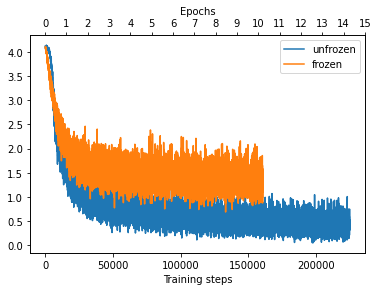

In [11]:
for key in key2data:
    print("plotting", key)
    for dat in data:
        print("plotting", dat, "for", key)
        plt.plot(key2data[key]['iter'], key2data[key][dat])

axes1 = plt.gca()
axes2 = axes1.twiny()
num_epochs = 15
new_tick_locs = [dataset_size*i for i in range(num_epochs + 1)]
axes2.set_xlim(axes1.get_xlim())
axes2.set_xticks(new_tick_locs)
axes2.set_xticklabels([i for i in range(num_epochs + 1)])
axes2.set_xlabel("Epochs")
axes1.set_xlabel("Training steps")
axes1.legend(legend)
plt.savefig('visualization.png')
plt.show()

In [ ]:
# Next step: visualize on validation set